In [1]:
from PIL import Image
import pandas as pd
import os, os.path,time
import csv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
Dimension = 64

In [3]:
fileList = []
def createFileList(myDir, format='.jpg'):
    
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

#load the original image from the folder "testofimagetocsv"


In [4]:
myFileList = createFileList('D:/age-and-gender-detection/testing')
# myFileList = createFileList('D:/age-and-gender-detection/dataset_Face')
# print(myFileList)

D:/age-and-gender-detection/testing


In [5]:
def split_file_name(filename):
    split_data = filename.split('_')
    # split_data2 = split_data[2].split('.')
    #same name hos matlab xina
    return (split_data)

In [6]:
new_dict = {
    'age':[],
    'gender':[],
    # 'image_name':[],
    'pixels':[]
    }

df = pd.DataFrame(new_dict)
for en,file in enumerate(myFileList):
    img_file = Image.open(file)
    img_file = img_file.resize((Dimension,Dimension))
    width, height = img_file.size
     
    print(en)
    # print('width,height',width,height) 
    #ans is 200 200

    # file_name = img_file.filename
    # print('file name :',file_name)
    
    head, tail = os.path.split(file)
    # print(tail)
    split_data = split_file_name(tail) 
    # print(split_data)

    format=img_file.format
    mode=img_file.mode

    #converting into gray scale
    #here L is single channel mode which is generally for converting into greyscale
    img_grey = img_file.convert('L')
    
    #converting into numpyarray
    #value=np.asarray(img_grey)
    value=np.asarray(img_grey.getdata(),dtype=np.int).reshape((img_grey.size[1],img_grey.size[0]))
    # print('value:',type(value),value)    
    
    #pandas feature 2d to 1d 
    value=value.flatten()
    # print(type(value))
    # print(value.shape)
    tostr = lambda x: [str(y) for y in x]
    
    name_array = ' '.join(tostr(value))
    # print(name_array)
    # ,age,gender,image_name,pixel
    # print(new_data)
    df.loc[en] = [str(split_data[0]),str(split_data[1]),name_array]
df.to_csv('../dataset/testing1.csv',index=False)    

0
1
2


In [2]:
data = pd.read_csv('../dataset/testing1.csv')
data.head()

,age,gender,pixels
0,25,1,127 143 150 142 129 137 142 106 43 20 20 15 7 ...
1,26,1,63 68 73 78 82 82 80 88 98 105 120 132 140 146...
2,30,1,95 113 130 133 128 128 101 81 71 56 48 51 50 4...


# Checking GreyScale or not

In [7]:
Checking_Dimension = 128

In [18]:
# # data=pd.read_csv("../dataset/age_gender.csv")
data = pd.read_csv('../dataset/dataset_bright_contrast.csv')
data.head()

,age,gender,pixels
0,25,1,132 137 143 147 148 148 148 147 142 137 137 14...
1,26,1,108 110 111 113 115 117 119 121 122 123 124 12...
2,30,1,115 114 122 125 129 129 136 136 125 131 136 12...


In [19]:
#convert pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x: np.array(x.split(), dtype="float32"))
data.head()

,age,gender,pixels
0,25,1,"[132.0, 137.0, 143.0, 147.0, 148.0, 148.0, 148..."
1,26,1,"[108.0, 110.0, 111.0, 113.0, 115.0, 117.0, 119..."
2,30,1,"[115.0, 114.0, 122.0, 125.0, 129.0, 129.0, 136..."


In [20]:
X = np.array(data['pixels'].tolist())
# print(X)

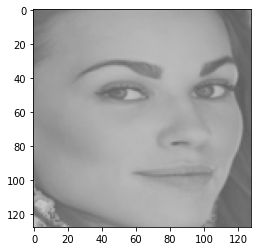

In [21]:
data = np.reshape(X[1], (Checking_Dimension, Checking_Dimension))
data = Image.fromarray(data)
imgg = plt.imshow(data)
plt.show(imgg)
# # saving the final output 
# # as a PNG file
# data.save('greyOrnot.png')

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

from scipy.linalg import eigh
import matplotlib.image as npim 

In [8]:
img = Image.open('peppers.jpg')
imggray = img.convert('LA')

# converting into array
imgmat = np.array(list(imggray.getdata(band=0)),float)

# converting into orginal image dimension
imgmat.shape = (imggray.size[1],imggray.size[0])

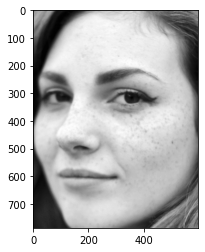

In [11]:
plt.figure(figsize=(5,4))
plt.imshow(imgmat,cmap='gray')
plt.show()

In [13]:
imgmat.shape

(787, 597)

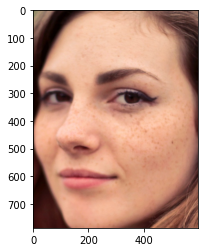

In [27]:
img = cv2.cvtColor(cv2.imread('peppers.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [28]:
img.shape

(787, 597, 3)

In [29]:
#Splitting into channels
blue,green,red = cv2.split(img)

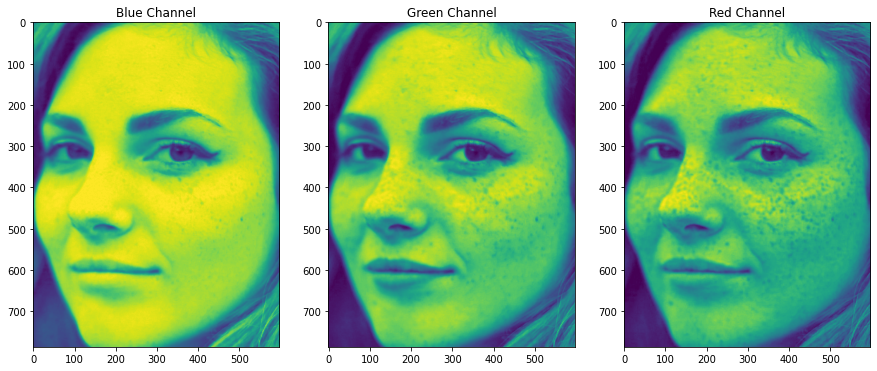

In [30]:
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [31]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,590,591,592,593,594,595,596
0,106,106,106,107,107,107,110,116,121,129,...,133,133,131,130,130,131,137,144,145,142
1,109,108,108,109,111,113,116,121,126,133,...,135,134,132,130,130,127,136,141,139,138
2,113,111,110,113,115,119,122,125,132,137,...,141,142,142,139,137,135,139,139,137,135
3,113,111,112,113,119,122,127,129,135,141,...,145,148,150,147,142,142,139,138,139,139
4,111,112,114,117,123,128,133,136,140,146,...,149,148,148,148,147,147,144,143,145,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,49,49,51,53,54,54,55,56,58,57,...,158,162,160,152,145,143,150,161,154,157
783,49,49,51,53,54,54,54,56,55,55,...,161,159,156,147,143,142,148,162,158,163
784,49,49,49,50,52,52,52,53,53,54,...,161,156,151,148,147,152,157,157,163,163
785,49,49,49,49,52,52,52,52,53,54,...,158,156,152,150,151,158,162,162,168,167


In [32]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [33]:
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [34]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(787, 50)
(787, 50)
(787, 50)


In [35]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9978962190190191
Green Channel: 0.9974773892755374
Red Channel  : 0.9955222998914051


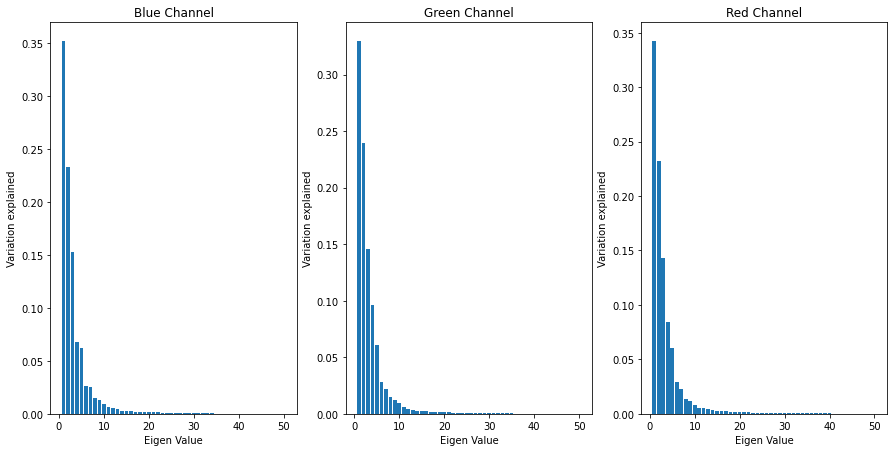

In [36]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [37]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(787, 597) (787, 597) (787, 597)


In [38]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(787, 597, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


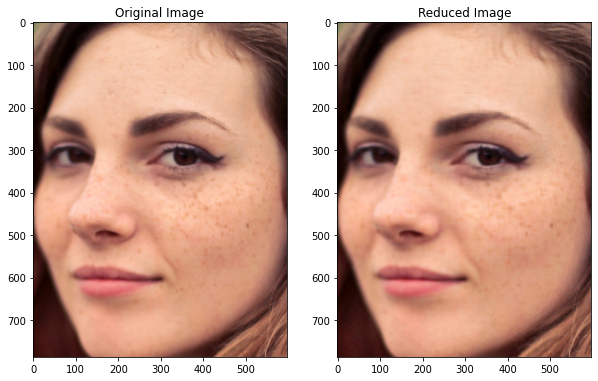

In [39]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()